# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Alifa Nurfika
- **Email:** alfikfa@student.ub.ac.id
- **ID Dicoding:** ALIFA NURFIKA

## Menentukan Pertanyaan Bisnis

1. Berapa rata-rata jumlah penggunaan sepeda tiap jamnya?
2. Berapa rata-rata jumlah penggunaan sepeda berdasarkan cuaca?
3. Berapa rata-rata jumlah penggunaan sepeda tiap bulan?
4. Berapa perbedaan antara jumlah pesewa sepeda berdasarkan jenisnya (casual dan registered)?

## Import Semua Packages/Library yang Digunakan

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [24]:
day_df = pd.read_csv('data/day.csv')
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [25]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

In [26]:
# menilai day_df => menilai tipe data tiap kolom
day_df.info() #gaada missing value tp kolom dteday tipe data object harusnya datetime
day_df.isna().sum()
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [27]:
# menilai hour_df => menilai tipe data tiap kolom
hour_df.info() #gaada missing value tp kolom dteday tipe data object harusnya datetime
hour_df.isna().sum()
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [28]:
# cleaning day_df
day_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi :", day_df.duplicated().sum())

Jumlah duplikasi : 0


In [29]:
# cleaning hour_df
hour_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi :", hour_df.duplicated().sum())

Jumlah duplikasi : 0


In [30]:
# mengganti tipe data dr object jadi datetime
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

  # memastikan tipe data sudah berubah
  day_df.info()
  hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

In [31]:
# membuat kolom baru 'days' u/ menampilkan nama hari
day_df['days'] = day_df['dteday'].dt.strftime('%A')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday


In [32]:
day_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
days                  object
dtype: object

In [33]:
day_df.describe(include="all")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday


In [34]:
# opsional
season_map = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}

day_df['season'] = day_df['season'].replace(season_map)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,2011-01-01,Winter,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
1,2,2011-01-02,Winter,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday
2,3,2011-01-03,Winter,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday
3,4,2011-01-04,Winter,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday
4,5,2011-01-05,Winter,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday


In [35]:
# Menyimpan dataframe day_df ke file CSV
day_df.to_csv("day_df_akhir.csv", index=False)
hour_df.to_csv("hour_df_akhir.csv", index=False)

mengelompokkan berdasarkan musim

In [36]:
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
Summer    188
Spring    182
Winter    179
Fall      176
Name: cnt, dtype: int64

mengemlompokkan peminjam brdsrkn bulan

In [37]:
day_df.groupby(by="mnth").cnt.nunique().sort_values(ascending=False)

mnth
1     62
5     62
7     62
8     62
10    62
12    62
3     60
4     60
6     60
9     60
11    60
2     57
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

1. Berapa rata-rata jumlah penggunaan sepeda tiap jamnya?

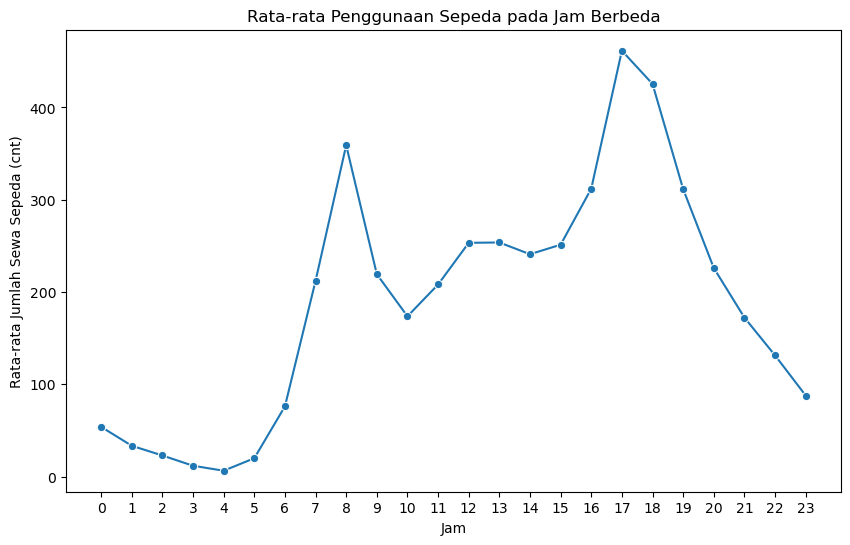

In [38]:
# 1. Berapa rata-rata jumlah penggunaan sepeda tiap jamnya?
plt.figure(figsize=(10, 6))
sns.lineplot(data=hour_df.groupby('hr')['cnt'].mean().reset_index(), x='hr', y='cnt', marker='o')
plt.title("Rata-rata Penggunaan Sepeda pada Jam Berbeda")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Sewa Sepeda (cnt)")
plt.xticks(range(0, 24))
plt.show()

### Pertanyaan 2:

2. Berapa rata-rata jumlah penggunaan sepeda berdasarkan cuaca?

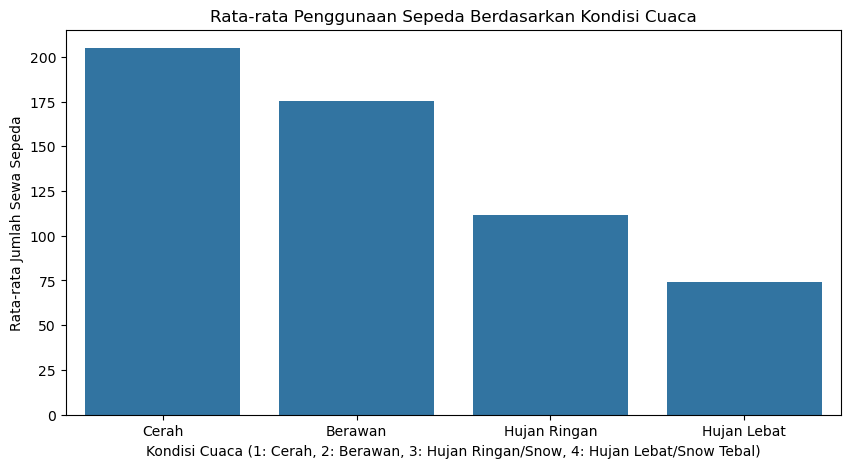

In [39]:
weather_avg = hour_df.groupby('weathersit')['cnt'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=weather_avg.index, y=weather_avg.values)
plt.title("Rata-rata Penggunaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (1: Cerah, 2: Berawan, 3: Hujan Ringan/Snow, 4: Hujan Lebat/Snow Tebal)")
plt.ylabel("Rata-rata Jumlah Sewa Sepeda")
plt.xticks([0, 1, 2, 3], ['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()

### Pertanyaan 3:

3. Berapa rata-rata jumlah penggunaan sepeda tiap bulan?

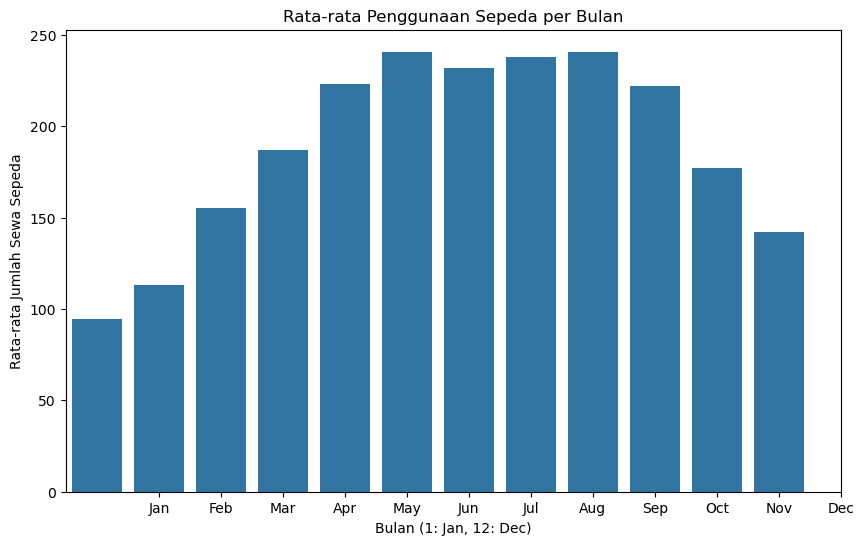

In [40]:
month_avg = hour_df.groupby('mnth')['cnt'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=month_avg.index, y=month_avg.values)
plt.title("Rata-rata Penggunaan Sepeda per Bulan")
plt.xlabel("Bulan (1: Jan, 12: Dec)")
plt.ylabel("Rata-rata Jumlah Sewa Sepeda")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Pertanyaan 4:

4. Berapa perbedaan antara jumlah pesewa sepeda berdasarkan jenisnya (casual dan registered)?

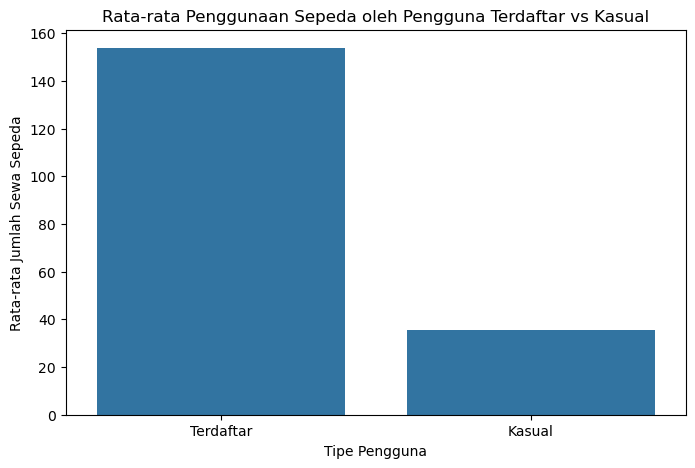

In [41]:
registered_avg = hour_df['registered'].mean()
casual_avg = hour_df['casual'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=['Terdaftar', 'Kasual'], y=[registered_avg, casual_avg])
plt.title("Rata-rata Penggunaan Sepeda oleh Pengguna Terdaftar vs Kasual")
plt.xlabel("Tipe Pengguna")
plt.ylabel("Rata-rata Jumlah Sewa Sepeda")
plt.show()

## Conclusion

**1. Jumlah pesewa sepeda tertinggi rata-rata ada pada jam 17 atau 5 sore yaitu sebanyak 400 lebih dan rata-rata paling sedikit pada pukul 4**<br>
**2. Rata-rata jumlah pesewa sepeda paling banyak ada pada saat cuacanya cerah yaitu 200 lebih dan paling sedikit saat cuaca hujan lebat yaitu lebih dari 50**<br>
**3. Rata-rata jumlah pesewa sepeda paling banyak ada pada bulan mei dan agustus**<br>
**4. Perbedaan jumlah pesewa yang registered jauh lebih banyak dibanding yang kasual**
